# Лабораторная работа №1

In [51]:
#импорт бибилиотек
import pandas as pd
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
#чтение файлов
orders = pd.read_csv('casc-resto.csv', sep = ';', parse_dates = ['RKDate'], decimal = ',')
castomers = pd.read_csv('CASC_Constant.csv', sep =',', parse_dates =['ActivationDate'])
orders.head()
orders.describe()

,CustomerID,Restaurant,Quantity,SummBasic,SummAfterPointsUsage
count,8.822220e+05,882222.000000,882222.000000,882222.000000,882222.000000
mean,2.809199e+06,468.268804,1.154900,287.725795,260.255589
std,6.178420e+04,279.170967,0.650287,264.555291,251.289517
min,2.728046e+06,40.000000,0.000000,0.500000,-2593.000000
25%,2.754886e+06,333.000000,1.000000,120.000000,110.000000
50%,2.785104e+06,434.000000,1.000000,225.000000,199.000000
75%,2.878900e+06,712.000000,1.000000,379.000000,348.940000
max,2.913132e+06,980.000000,107.000000,29450.000000,29450.000000


In [14]:
castomers.head()

,CustomerId,ActivationDate,Age,Sex,SubscribedEmail,SubscribedPush
0,2728183,2015-01-01,21.0,Female,False,True
1,2728198,2015-01-01,21.0,Female,True,True
2,2728306,2015-01-01,21.0,Female,True,True
3,2728178,2015-01-01,22.0,Male,True,True
4,2728322,2015-01-01,22.0,Male,True,True


In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882222 entries, 0 to 882221
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CustomerID            882222 non-null  int64         
 1   Restaurant            882222 non-null  int64         
 2   RKDate                882222 non-null  datetime64[ns]
 3   RegionName            882222 non-null  object        
 4   BrandsNames           882222 non-null  object        
 5   DishCategoryName      881608 non-null  object        
 6   Quantity              882222 non-null  int64         
 7   SummBasic             882222 non-null  float64       
 8   SummAfterPointsUsage  882222 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 60.6+ MB


In [18]:
castomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerId       10000 non-null  int64         
 1   ActivationDate   10000 non-null  datetime64[ns]
 2   Age              9953 non-null   float64       
 3   Sex              8874 non-null   object        
 4   SubscribedEmail  10000 non-null  bool          
 5   SubscribedPush   10000 non-null  bool          
dtypes: bool(2), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 332.2+ KB


In [30]:
# мы теряем много данных из-за ненужной информации, заполним нули
Dish_indexes = orders[orders.DishCategoryName.isnull()].index
orders.loc[Dish_indexes, 'DishCategoryName'] = 'No info'
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882222 entries, 0 to 882221
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CustomerID            882222 non-null  int64         
 1   Restaurant            882222 non-null  int64         
 2   RKDate                882222 non-null  datetime64[ns]
 3   RegionName            882222 non-null  object        
 4   BrandsNames           882222 non-null  object        
 5   DishCategoryName      882222 non-null  object        
 6   Quantity              882222 non-null  int64         
 7   SummBasic             882222 non-null  float64       
 8   SummAfterPointsUsage  882222 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 60.6+ MB


In [31]:
castomers = clients.dropna()
castomers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8856 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerId       8856 non-null   int64         
 1   ActivationDate   8856 non-null   datetime64[ns]
 2   Age              8856 non-null   float64       
 3   Sex              8856 non-null   object        
 4   SubscribedEmail  8856 non-null   bool          
 5   SubscribedPush   8856 non-null   bool          
dtypes: bool(2), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 363.2+ KB


In [15]:
orders.describe()

,CustomerID,Restaurant,Quantity,SummBasic,SummAfterPointsUsage
count,8.822220e+05,882222.000000,882222.000000,882222.000000,882222.000000
mean,2.809199e+06,468.268804,1.154900,287.725795,260.255589
std,6.178420e+04,279.170967,0.650287,264.555291,251.289517
min,2.728046e+06,40.000000,0.000000,0.500000,-2593.000000
25%,2.754886e+06,333.000000,1.000000,120.000000,110.000000
50%,2.785104e+06,434.000000,1.000000,225.000000,199.000000
75%,2.878900e+06,712.000000,1.000000,379.000000,348.940000
max,2.913132e+06,980.000000,107.000000,29450.000000,29450.000000


In [16]:
castomers.describe()

,CustomerId,Age
count,1.000000e+04,9953.000000
mean,2.812482e+06,32.894203
std,6.227632e+04,11.954687
min,2.728046e+06,16.000000
25%,2.756356e+06,26.000000
50%,2.794998e+06,31.000000
75%,2.880618e+06,37.000000
max,2.913132e+06,247.000000


In [32]:
#чистим данные от нереальных решений
castomers = castomers[castomers.Age < 100]
orders = orders[orders.SummAfterPointsUsage > 0]
d = {'Male' : 0, 'Female' : 1}
castomers['Sex'] = castomers['Sex'].map(d)
castomers.head()

,CustomerId,ActivationDate,Age,Sex,SubscribedEmail,SubscribedPush
0,2728183,2015-01-01,21.0,1,False,True
1,2728198,2015-01-01,21.0,1,True,True
2,2728306,2015-01-01,21.0,1,True,True
3,2728178,2015-01-01,22.0,0,True,True
4,2728322,2015-01-01,22.0,0,True,True


In [52]:
def SomeInfo(x):
    Data={}
    #посещал ли в нужный нам период 
    Data['Y']=((x['RKDate']>'2017-07-01')&(x['RKDate']<'2017-12-31')).any()
    # количество дней до последнего визита клиента перед зафиксированной датой 2017-07-01
    Data['Recency']=(datetime.strptime('2017-07-01', "%Y-%m-%d")-x['RKDate'][x['RKDate']<'2017-07-01'].max()).days
    # скок раз ходил до нашей даты
    Data['visits']=len(x['RKDate'][x['RKDate']<'2017-07-01'].unique().tolist())
    #средняя частота походов клиентов на дату
    Data['Frequency']=Data['visits']*30/(datetime.strptime('2017-07-01', "%Y-%m-%d")-x['RKDate'][x['RKDate']<'2017-07-01'].min()).days
    #средний чек клиента по всем покупкам до 2017-07-01
    Data['average_check']=x['SummBasic'].sum()/Data['visits']
    Data['average_check_discount']=x['SummAfterPointsUsage'].sum()/Data['visits']
    return pd.Series(Data)
    
CustomInfo=orders.groupby('CustomerID').apply(SomeInfo).reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


In [53]:
CustomInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              10000 non-null  int64  
 1   Y                       10000 non-null  bool   
 2   Recency                 9938 non-null   float64
 3   visits                  10000 non-null  int64  
 4   Frequency               9938 non-null   float64
 5   average_check           10000 non-null  float64
 6   average_check_discount  10000 non-null  float64
dtypes: bool(1), float64(4), int64(2)
memory usage: 478.6 KB


In [54]:
CustomInfo = CustomInfo.join(castomers[['CustomerId', 'Age', 'Sex']].set_index('CustomerId'),
                                        on = ['CustomerID'], how='right')

In [56]:
# смотрим, есть ли какие-нибудь не реальные показатели
CustomInfo.describe()

,CustomerID,Recency,visits,Frequency,average_check,average_check_discount,Age,Sex
count,8.782000e+03,8727.000000,8782.000000,8727.000000,8782.000000,8782.000000,8782.000000,8782.000000
mean,2.812398e+06,253.738856,15.472671,0.604373,inf,inf,32.079595,0.579481
std,6.229353e+04,252.560372,24.109436,0.979800,NaN,NaN,8.010494,0.493670
min,2.728046e+06,1.000000,0.000000,0.032895,179.545455,163.363636,16.000000,0.000000
25%,2.756157e+06,41.000000,4.000000,0.176237,1263.000000,1157.475000,26.000000,0.000000
50%,2.795250e+06,152.000000,8.000000,0.339367,1766.416667,1616.841667,31.000000,1.000000
75%,2.880359e+06,425.000000,17.000000,0.666667,2449.000000,2241.306818,36.750000,1.000000
max,2.913132e+06,912.000000,495.000000,30.000000,inf,inf,83.000000,1.000000


In [57]:
CustomInfo = CustomInfo.dropna()
CustomInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8727 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              8727 non-null   int64  
 1   Y                       8727 non-null   bool   
 2   Recency                 8727 non-null   float64
 3   visits                  8727 non-null   int64  
 4   Frequency               8727 non-null   float64
 5   average_check           8727 non-null   float64
 6   average_check_discount  8727 non-null   float64
 7   Age                     8727 non-null   float64
 8   Sex                     8727 non-null   int64  
dtypes: bool(1), float64(5), int64(3)
memory usage: 622.1 KB


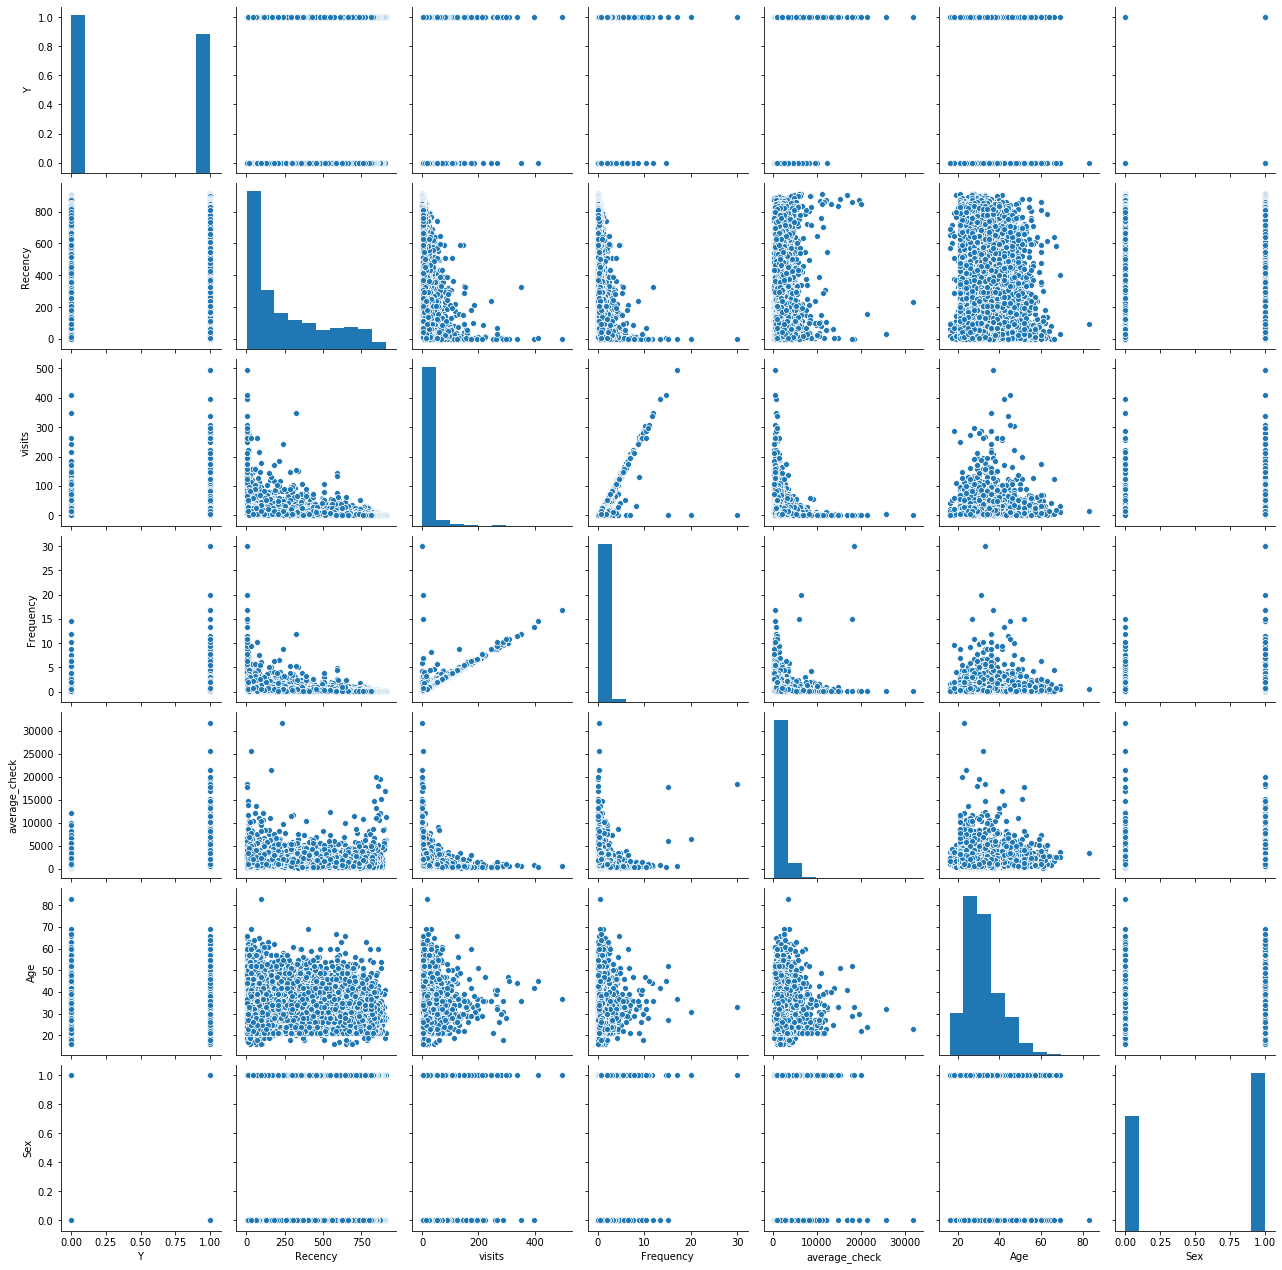

In [64]:
d = {False : 0, True : 1}
CustomInfo['Y'] = CustomInfo['Y'].map(d)
attributes = ['Y','Recency', 'visits', 'Frequency', 'average_check','Age','Sex']
sns_plot=sns.pairplot(CustomInfo[attributes])

In [48]:
X = CustomInfo.drop('Y', axis=1)
y = CustomInfo['Y']
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state = 37, test_size=0.2)
model = LogisticRegression(random_state = 25, solver='lbfgs', max_iter=120)
model.fit(X_train, y_train)
#Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)
print('score:', model.score(X_test, y_test))

score: 0.7623138602520045


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.81      0.71      0.76       914
        True       0.72      0.82      0.77       832

    accuracy                           0.76      1746
   macro avg       0.77      0.76      0.76      1746
weighted avg       0.77      0.76      0.76      1746

